In [79]:
from database_handler import WorkBook

In [80]:
workbook = WorkBook() 

In [82]:
workbook.open("D:\\Projects\\SiriusBV3\\file_projecttext\\нерабочее\\окончательный отчет ВТД  411(1)_1.xlsx")            
workbook.get_info()               
workbook.process_the_db()

In [83]:
indexs = list([int(x) for x in "4 5 6 7 8 10 11 13".split(" ")])

In [84]:
table = {
    "врезка" : [1, 0, 0, 0, 0, 0],
    "отвод": [0, 1, 0, 0, 0, 0],
    "задвижка": [0, 0, 1, 0, 0, 0],
    "Фланец": [0, 0, 0, 1, 0, 0],
    "связ. с производством": [0, 0, 0, 0, 1, 0],
    "отложения": [0, 0, 0, 0, 0, 1]
}
untable = ["врезка","отвод", "задвижка", "Фланец", "связ. с производством", "отложения"]

In [85]:
rotate = list([float(workbook.db[4][x]) if workbook.db[4][x] != "" else 0.0 for x in range(len(workbook.db[4]))])

In [86]:
wallwide = list([float(workbook.db[5][x]) if workbook.db[5][x] != "" else 0.0 for x in range(len(workbook.db[5]))])

In [87]:
losswide = list([float(workbook.db[6][x]) if workbook.db[6][x] != "" else (float(workbook.db[5][x]) if workbook.db[5][x] != "" else 0.0) for x in range(len(workbook.db[6]))])

In [88]:
deep = list([float(workbook.db[7][x]) if workbook.db[7][x] != "" else 0.0 for x in range(len(workbook.db[7]))])

In [89]:
deep_percent = list([float(workbook.db[8][x]) if workbook.db[8][x] != "" else 0.0 for x in range(len(workbook.db[8]))])

In [90]:
length = list([float(workbook.db[10][x]) if workbook.db[10][x] != "" else 0.0 for x in range(len(workbook.db[10]))])

In [91]:
width = list([float(workbook.db[11][x]) if workbook.db[11][x] != "" else 0.0 for x in range(len(workbook.db[11]))])

In [92]:
type = list([workbook.db[13][x] if workbook.db[13][x] != "" else "Нет ничего особенного" for x in range(len(workbook.db[13]))])

In [ ]:
import torch

device = "cpu"#cuda:0

In [105]:
str(torch.nn.RNN(15, 3))

'RNN(15, 3)'

In [106]:
class extract_tensor(torch.nn.Module):
    def forward(self,x):
        tensor, _ = x
        return tensor

class ModelCreate(torch.nn.Module):
    def __init__(self, layers):
        super(ModelCreate, self).__init__()
        type_layer = {"Полносвязный слой": torch.nn.Linear, "Реккурентный слой": torch.nn.RNN, "LSTM": torch.nn.LSTM, "GRU": torch.nn.GRU}
        type_activation = {"Sigmoid": torch.nn.Sigmoid(), "ReLU": torch.nn.ReLU(), "Tanh": torch.nn.Tanh(), "Softmax": torch.nn.Softmax(dim=1)}
        self.layers = list([type_layer[layers[i//2][0]](layers[i//2][1], layers[i//2][2]) if i % 2 == 0 else type_activation[layers[i//2][3]] for i in range(2*len(layers))])
        self.second_layers = []
        for name_id in range(len(self.layers)):
            if "LSTM" in str(self.layers[name_id]) or "RNN" in str(self.layers[name_id]) or "GRU" in str(self.layers[name_id]):
                self.second_layers.append(self.layers[name_id])
                self.second_layers.append(extract_tensor())
            else: self.second_layers.append(self.layers[name_id])
        self.named_layers = list([x[0] for x in layers])
        self.layer_seq = torch.nn.Sequential(*self.second_layers)


    def forward(self, x):
        x = self.layer_seq(x)
        return x

In [294]:
model = ModelCreate([["LSTM", 7, 16, "ReLU"], ["LSTM", 16, 32, "ReLU"], ["Полносвязный слой", 32, 16, "ReLU"], ["Полносвязный слой", 16, 5, "Softmax"]])

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size, hidden_size)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size // 2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.fc2 = nn.Linear(hidden_size // 4, output_size)  # Output size is 5
        
        # Activation functions
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Input shape: (seq_len, batch, input_size)
        # Output shape: (seq_len, batch, hidden_size)
        lstm_out1, _ = self.lstm1(x)
        lstm_out2, _ = self.lstm2(lstm_out1)
        
        out = self.relu(self.fc1(lstm_out2))
        out = self.softmax(self.fc2(out))
        
        return out

In [257]:

# Example usage:
input_size = 7
hidden_size = 32
output_size = 5
model2 = MyModel(input_size, hidden_size, output_size).to(device)

# Define loss function and optimizer

In [295]:
device = "cuda:0"

In [259]:
model, model2

(ModelCreate(
   (layer_seq): Sequential(
     (0): LSTM(7, 8)
     (1): extract_tensor()
     (2): ReLU()
     (3): LSTM(8, 16)
     (4): extract_tensor()
     (5): ReLU()
     (6): Linear(in_features=16, out_features=5, bias=True)
     (7): Softmax(dim=1)
   )
 ),
 MyModel(
   (lstm1): LSTM(7, 32)
   (lstm2): LSTM(32, 16)
   (fc1): Linear(in_features=16, out_features=8, bias=True)
   (fc2): Linear(in_features=8, out_features=5, bias=True)
   (relu): ReLU()
   (softmax): Softmax(dim=1)
 ))

In [296]:
criterion = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00005)

In [110]:
def smal_func(type_is):
    if type_is.lower() in ["отвод", "врезка", "задвижка", "фланец"]:
        return [0, 0, 0, 1, 0]
    elif type_is.lower() == "связ. с производством. внутр":
        return [1, 0, 0, 0, 0]
    elif type_is.lower() == "связ. с производством. внеш":
        return [0, 0, 1, 0, 0]
    elif type_is.lower() in ["отложения", "изм. толщ. ст."]:
        return [0, 1, 0, 0, 0]
    return [0, 0, 0, 0, 1]

input_list = list([[rotate[x], wallwide[x], losswide[x], 
                deep[x], deep_percent[x], length[x],
                width[x]] for x in range(len(rotate))])
type_list = list([smal_func(type[x]) for x in range(len(type))])


tt_input = torch.Tensor(input_list).to(device)
tt_output = torch.Tensor(type_list).to(device)

In [318]:
id_ = 97

In [319]:
tt_input[id_], tt_output[id_]

(tensor([36.0000, 11.4000, 10.0000,  1.4000, 12.0000, 51.0000, 53.0000],
        device='cuda:0'),
 tensor([1., 0., 0., 0., 0.], device='cuda:0'))

In [320]:
model(tt_input[id_].unsqueeze(0)).squeeze(0)

tensor([0.3551, 0.1804, 0.2064, 0.2252, 0.0329], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

In [321]:
torch.argmax(tt_output[id_]).item(), torch.argmax(model(tt_input[id_].unsqueeze(0)).squeeze(0)).item()

(0, 0)

In [297]:
test_losses = []
valid_losses = []
train_losses = []

In [298]:
model = model.to(device)
tt_input = tt_input.to(device)
tt_output = tt_output.to(device)

In [314]:
import random

num_epochs = 10
for epoch in range(num_epochs):
    # Generate dummy input and target data for demonstration
    losses = 0
    for i in range(len(tt_input)):
        # Forward pass
        output = model(tt_input[i].unsqueeze(0))
        
        # Compute the loss
        loss = criterion(output, tt_output[i].unsqueeze(0))
        
        # Zero gradients, backward pass, and optimization
        optimizer.zero_grad()
        losses += loss.item()
        loss.backward()
        optimizer.step()
        
        
        # Print the loss every few epochs
    losses = losses / len(tt_input)
    validloss = losses * random.randint(80, 100) / 100
    test_losses.append(losses * random.randint(70, 100) / 100)
    valid_losses.append(validloss)

    train_losses.append(losses)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.12f}')

print("Training finished!")


Epoch [1/10], Loss: 0.000000000568
Epoch [2/10], Loss: 0.000000000538
Epoch [3/10], Loss: 0.000000000515
Epoch [4/10], Loss: 0.000000000508
Epoch [5/10], Loss: 0.000000000497
Epoch [6/10], Loss: 0.000000000477
Epoch [7/10], Loss: 0.000000000461
Epoch [8/10], Loss: 0.000000000440
Epoch [9/10], Loss: 0.000000000432
Epoch [10/10], Loss: 0.000000000423
Training finished!


In [323]:
torch.save(model.state_dict(), "D:\\Projects\\SiriusBV3\\add\\model2.pt")

In [315]:
all_variables = 0
for i in range(len(tt_input)):
   output = model(tt_input[i].unsqueeze(0))
   all_variables += torch.pow(torch.sum(abs(output - tt_output[i].unsqueeze(0))), 2).item()
print(100 * all_variables / len(tt_input))

6.877989938380765


In [316]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(train_losses))), y=train_losses, mode='lines+markers',  name='train_losses'))
fig.add_trace(go.Scatter(x=list(range(len(valid_losses))), y=valid_losses, mode='lines+markers',  name='valid_losses'))
fig.add_trace(go.Scatter(x=list(range(len(test_losses))), y=test_losses, mode='lines+markers',  name='test_losses'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

tensor([[  3.,   0.,   0.,   0.,   0.],
        [  2.,   0.,   0.,   0.,   0.],
        [  2.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  20.,   0.],
        [  0.,   0.,   0.,   0., 186.]])
tensor([1., 0., 0., 1., 1.])


Text(0.5, 80.7222222222222, 'Предсказанные определения')

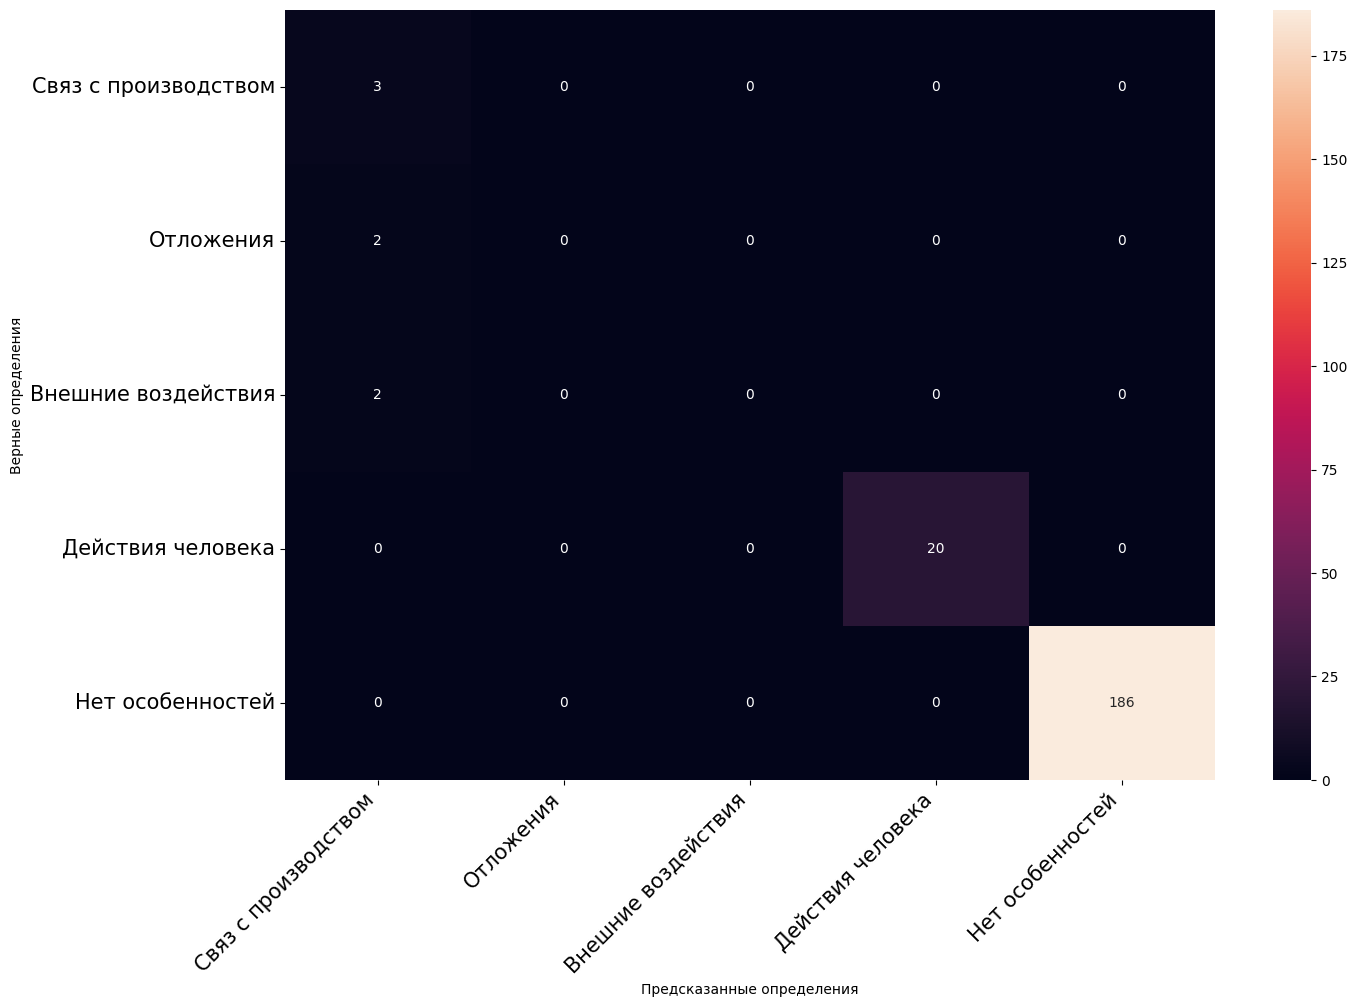

In [317]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

nb_classes = 5

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(list([(tt_input[x],tt_output[x]) for x in range(len(tt_output))])):
        preds = torch.argmax(model(tt_input[i].unsqueeze(0)).squeeze(0))
        inp = torch.argmax(classes)
        confusion_matrix[inp.item(), preds.item()] += 1

print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(15,10))


class_names = ['Связ с производством', 'Отложения','Внешние воздействия', 'Действия человека','Нет особенностей']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('Верные определения')
plt.xlabel('Предсказанные определения')